In [2]:
import pandas as pd

import sqlite3

In [3]:
con = sqlite3.connect("../data/checking-logs.sqlite.sqlite") ##!!! change directory

In [3]:
df = pd.read_sql_query("SELECT timestamp as datetime FROM checker where uid like 'user%'", con, parse_dates=["datetime"])

In [4]:
df["time"] = df["datetime"].dt.hour

# df.set_index(["user"], drop=True, inplace=True)
# df.drop(["time"], axis=1, inplace=True)

In [5]:
df

,datetime,time
0,2020-04-17 05:19:02.744528,5
1,2020-04-17 05:22:35.249331,5
2,2020-04-17 05:22:45.549397,5
3,2020-04-17 05:34:14.691200,5
4,2020-04-17 05:34:24.422370,5
...,...,...
3202,2020-05-21 20:19:06.872761,20
3203,2020-05-21 20:22:41.785725,20
3204,2020-05-21 20:22:41.877806,20
3205,2020-05-21 20:37:00.129678,20


In [6]:
df["weekday"] = df["datetime"].dt.weekday

In [7]:
df_workingday = df[df["weekday"] < 5]

In [8]:
df_weekend = df[df["weekday"] >= 5]

In [9]:
df_weekend.groupby(df_weekend["time"])

,datetime,time,weekday
0,2020-04-17 05:19:02.744528,5,4
1,2020-04-17 05:22:35.249331,5,4
2,2020-04-17 05:22:45.549397,5,4
3,2020-04-17 05:34:14.691200,5,4
4,2020-04-17 05:34:24.422370,5,4
...,...,...,...
3202,2020-05-21 20:19:06.872761,20,3
3203,2020-05-21 20:22:41.785725,20,3
3204,2020-05-21 20:22:41.877806,20,3
3205,2020-05-21 20:37:00.129678,20,3


In [70]:
grouped_workingday = df_workingday.groupby([df_workingday["time"], df["datetime"].dt.date]).count()
grouped_workingday.rename({"time":"count"}, inplace=True, axis=1)
df_final = pd.DataFrame(grouped_workingday.groupby("time").mean().iloc[:,1], columns=["weekday"])
df_final

,weekday
time,
0,3.000000
3,2.000000
5,7.500000
6,1.500000
7,5.166667
8,3.700000
9,6.000000
10,13.200000
11,6.769231


In [72]:
grouped_weekend = df_weekend.groupby([df_weekend["time"], df["datetime"].dt.date]).count()
grouped_weekend.rename({"time":"count"}, inplace=True, axis=1)
df_final["weekend"] = grouped_weekend.groupby("time").mean().iloc[:,1]
df_final.fillna(0, inplace=True)

,weekday,weekend
time,,
0,3.000000,2.000000
3,2.000000,1.000000
5,7.500000,2.000000
6,1.500000,0.000000
7,5.166667,4.000000
8,3.700000,7.000000
9,6.000000,3.666667
10,13.200000,7.000000
11,6.769231,23.600000


In [74]:
for hour in range(0, 24):
    if hour not in df_final.index.values:
        df_final.loc[hour] = [0, 0]
df_final.sort_index(inplace=True)

array([<AxesSubplot:title={'center':'weekday'}, xlabel='time'>,
       <AxesSubplot:title={'center':'weekend'}, xlabel='time'>],
      dtype=object)

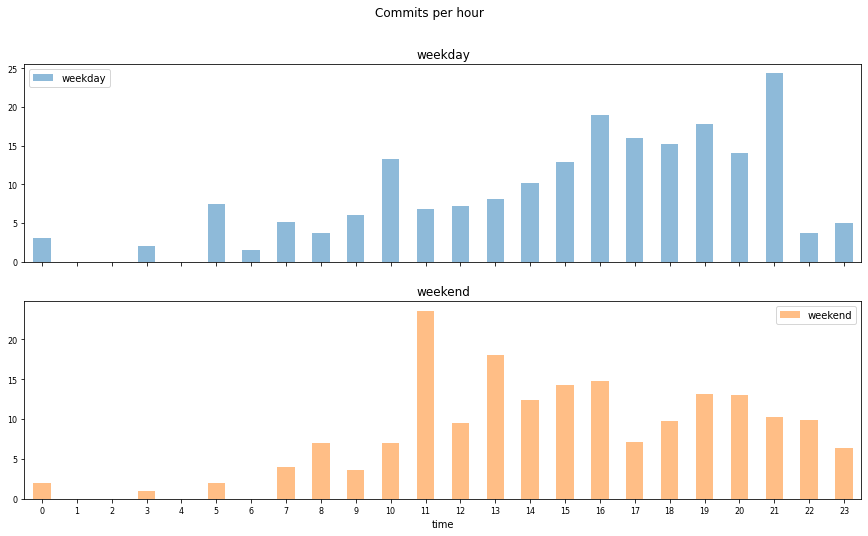

In [75]:
df_final.plot.bar(subplots=True, 
                                           sharex=True,
                                           figsize=(15, 8),
                                           fontsize=8,
                                           title='Commits per hour',
                                           alpha=0.5,
                                           rot=0
                                          )

In [76]:
con.close()